# Pequeño ejercicio de Regresión Lineal

In [28]:
# Cargando librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Cargando y pequeño head del dataset
df = pd.read_csv("honeyproduction.csv")
df.head()

,state,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year
0,AL,16000.0,71,1136000.0,159000.0,0.72,818000.0,1998
1,AZ,55000.0,60,3300000.0,1485000.0,0.64,2112000.0,1998
2,AR,53000.0,65,3445000.0,1688000.0,0.59,2033000.0,1998
3,CA,450000.0,83,37350000.0,12326000.0,0.62,23157000.0,1998
4,CO,27000.0,72,1944000.0,1594000.0,0.70,1361000.0,1998


In [7]:
# Quiero ver producción total por año

prod_per_year =df.groupby("year").totalprod.agg(np.mean).reset_index()
prod_per_year

,year,totalprod
0,1998,5.105093e+06
1,1999,4.706674e+06
2,2000,5.106000e+06
3,2001,4.221545e+06
4,2002,3.892386e+06
5,2003,4.122091e+06
6,2004,4.456805e+06
7,2005,4.243146e+06
8,2006,3.761902e+06
9,2007,3.600512e+06


In [16]:
# Creamos variable independiente el cual sería el año en este caso
X = prod_per_year.year
# Hacemos el reshape para que quede como array
X = X.values.reshape(-1,1) #" Quiero todas las filas ncesarias en una columna"
X

array([[1998],
       [1999],
       [2000],
       [2001],
       [2002],
       [2003],
       [2004],
       [2005],
       [2006],
       [2007],
       [2008],
       [2009],
       [2010],
       [2011],
       [2012]], dtype=int64)

In [20]:
# Queremos tambien la variable respuesta
y = prod_per_year["totalprod"]
y

0     5.105093e+06
1     4.706674e+06
2     5.106000e+06
3     4.221545e+06
4     3.892386e+06
5     4.122091e+06
6     4.456805e+06
7     4.243146e+06
8     3.761902e+06
9     3.600512e+06
10    3.974927e+06
11    3.626700e+06
12    4.382350e+06
13    3.680025e+06
14    3.522675e+06
Name: totalprod, dtype: float64

Text(0.5, 0.98, 'Producción Total por Año')

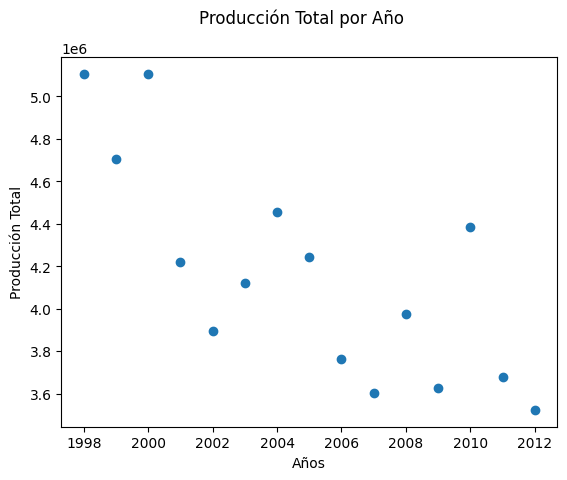

In [26]:
# Ploteamos para ver como se comportan los datos visualmente
plt.scatter(X,y)
plt.xlabel("Años")
plt.ylabel("Producción Total")
plt.suptitle("Producción Total por Año")

# Viendo el gráfico ya podemos empezar a imaginarnos la línea y su pendiente!

## Creando la RL con sklearn

In [31]:
# Instanciamos en una variable la clase necesaria
from sklearn.linear_model import LinearRegression
regr = LinearRegression()
# Entrenamos el modelo con X e y
regr.fit(X,y)

# Obtenemos pendiente
print(regr.coef_) # Como habiamos imaginado, es negativa
# Obtenemos el intercepto
print(regr.intercept_)

[-88303.18915238]
181208083.10732976


In [32]:
# Creamos lista la cuales son las predicciones que el modelo "regr" que creamos hará con la data en "X"
y_predict = regr.predict(X) # En este caso simple no usamos ni datos de testeo,validación ni entrenamiento!
y_predict

array([4778311.18087068, 4690007.99171829, 4601704.8025659 ,
       4513401.61341354, 4425098.42426115, 4336795.23510876,
       4248492.04595637, 4160188.85680401, 4071885.66765162,
       3983582.47849923, 3895279.28934684, 3806976.10019448,
       3718672.91104209, 3630369.7218897 , 3542066.53273734])

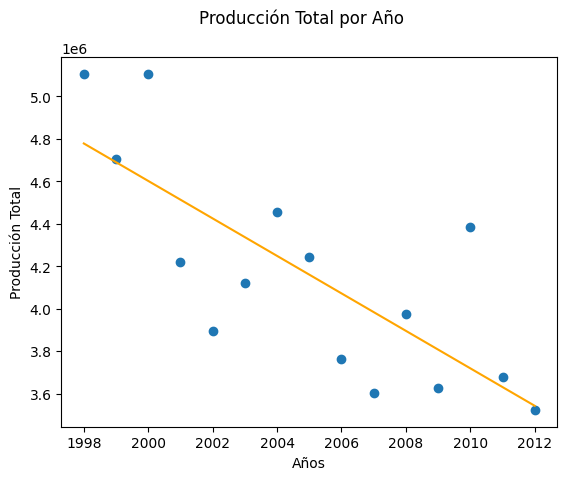

In [35]:
# Ploteamos la línea (valores ajustados) por sobre los datos reales
plt.scatter(X,y)
plt.plot(X,y_predict,color="orange")
plt.xlabel("Años")
plt.ylabel("Producción Total")
plt.suptitle("Producción Total por Año")
plt.show()

# Obtuvimos los valores ajustados prediciendo X con el modelo de regresión lineal creado

## Hagamos una predicción!

In [42]:
# Por lo que el modelo nos indica, la producción de miel en los ultimos años ha ido decayendo
# Predigamos cual sería la producción el año 2050 (si se que es exagerado, pero es por temas de ejercicio jeje).
# Nuestro dataset se detiene en el año 2013, así que creemos un array que va desde el 2013 hasta el 2050 con numeros entre 1 y 10

X_future = np.array(range(2013,2051))
X_future = X_future.reshape(-1,1)
X_future.T

array([[2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023,
        2024, 2025, 2026, 2027, 2028, 2029, 2030, 2031, 2032, 2033, 2034,
        2035, 2036, 2037, 2038, 2039, 2040, 2041, 2042, 2043, 2044, 2045,
        2046, 2047, 2048, 2049, 2050]])

In [43]:
# Prediciendo los años entre el 2013 y 2050
future_predict = regr.predict(X_future)
future_predict # Supuesta producción para cada año entre el 2013 y 2050

array([3453763.34358495, 3365460.15443256, 3277156.96528018,
       3188853.77612782, 3100550.58697543, 3012247.39782304,
       2923944.20867065, 2835641.01951829, 2747337.8303659 ,
       2659034.64121351, 2570731.45206112, 2482428.26290876,
       2394125.07375637, 2305821.88460398, 2217518.69545159,
       2129215.50629923, 2040912.31714684, 1952609.12799445,
       1864305.93884209, 1776002.7496897 , 1687699.56053731,
       1599396.37138492, 1511093.18223256, 1422789.99308017,
       1334486.80392778, 1246183.61477539, 1157880.42562303,
       1069577.23647064,  981274.04731825,  892970.85816586,
        804667.6690135 ,  716364.47986111,  628061.29070872,
        539758.10155633,  451454.91240397,  363151.72325158,
        274848.53409919,  186545.34494683])

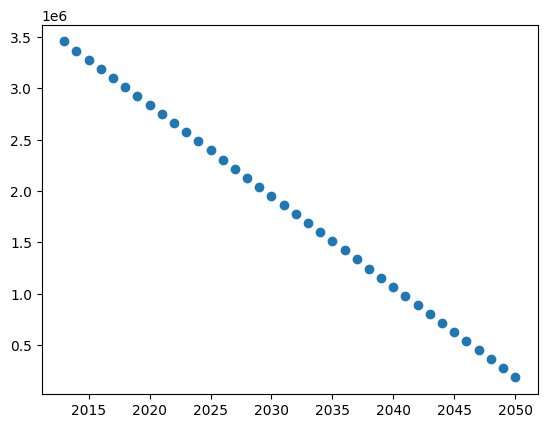

In [45]:
# Plotiemos como se vería nuestra predicción para estos años
plt.scatter(X_future,future_predict)

# Con este modelo, la predicción es mortal!, para el año 2050 no habría casi nada de producción de miel.